In [1]:
import os
from pathlib import Path

curr_dir = Path(os.getcwd())
root_dir = curr_dir.parent
data_dir = root_dir / 'data'

train_fpath = data_dir / 'training.tsv'
dev_fpath = data_dir / 'dev.tsv'

In [2]:
import pandas as pd

train_df = pd.read_csv(train_fpath,sep='\t')
dev_df = pd.read_csv(dev_fpath,sep='\t')

Checking number of topics in train and dev set.

In [3]:
topics = set(train_df['topic_id'])
print('Topics {topics} in train\nNumber of topics: {num_topics}'.format(topics = topics, num_topics = len(topics)))

topics = set(dev_df['topic_id'])
print('Topics {topics} in dev\nNumber of topics: {num_topics}'.format(topics = topics, num_topics = len(topics)))

Topics {'covid-19'} in train
Number of topics: 1
Topics {'covid-19'} in dev
Number of topics: 1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(train_df.groupby(['claim'])['tweet_id'].count())
print(dev_df.groupby(['claim'])['tweet_id'].count())

# Count plot to show the number of claims belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y="claim", data=train_df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of tweets by Claim",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Claims",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Claim or Not Claim",fontdict= {'size':16})
plt.show()

# Count plot to show the number of claims belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y="claim", data=dev_df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of tweets by Claim",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Claims",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Claim or Not Claim",fontdict= {'size':16})
plt.show()

claim
0    158
1    329
Name: tweet_id, dtype: int64
claim
0     40
1    110
Name: tweet_id, dtype: int64


/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1050x700 with 1 Axes>

<Figure size 1050x700 with 1 Axes>

claim  claim_worthiness
0      0                   158
1      0                   110
       1                   219
Name: tweet_id, dtype: int64
claim  claim_worthiness
0      0                   36
       1                    4
1      0                   42
       1                   68
Name: tweet_id, dtype: int64


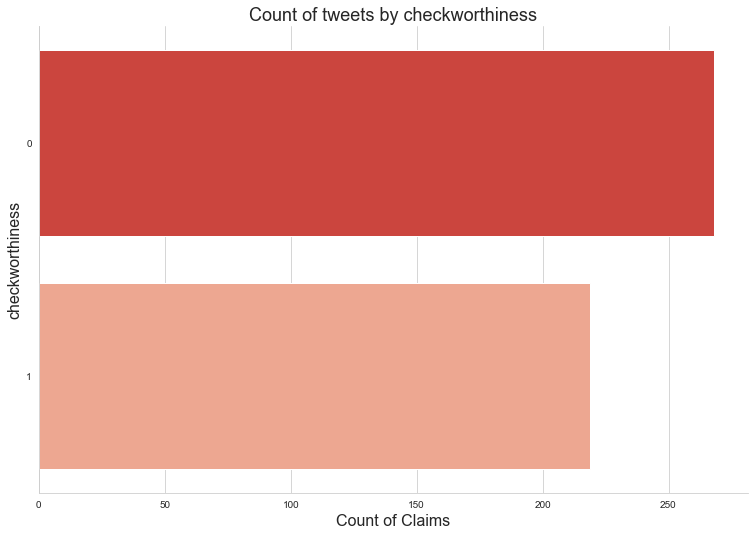

Text(15.050000000000008, 0.5, 'checkworthiness')

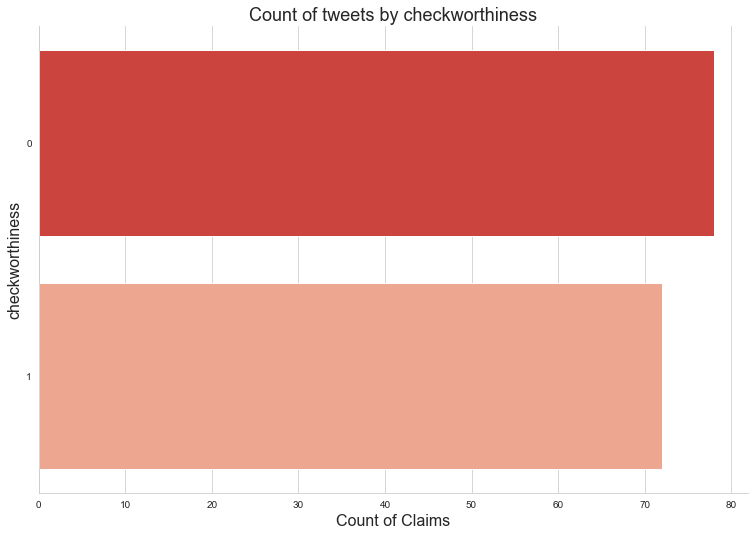

In [5]:
print(train_df.groupby(['claim', 'claim_worthiness'])['tweet_id'].count())
print(dev_df.groupby(['claim', 'claim_worthiness'])['tweet_id'].count())

# Count plot to show the number of claims belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y='claim_worthiness', data=train_df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of tweets by checkworthiness",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Claims",fontdict= {'size':16})
g.ax.yaxis.set_label_text("checkworthiness",fontdict= {'size':16})
plt.show()

# Count plot to show the number of claims belonging to each brand
sns.set_style("whitegrid")
g = sns.factorplot(y='claim_worthiness', data=dev_df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Count of tweets by checkworthiness",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Claims",fontdict= {'size':16})
g.ax.yaxis.set_label_text("checkworthiness",fontdict= {'size':16})

## Samples which are not claim and not checkworthy

In [6]:
pd.set_option('display.max_colwidth', -1)
train_df[(train_df['claim'] == 0) & (train_df['claim_worthiness'] == 0)]['tweet_text']

/Users/tmp/Documents/veracity-detection/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


1      Thanks, #MichaelBloomberg. Here’s a handy little (unintentional) demo on the way to spread #coronavirus by the most clueless person in America: touch community food as much as you can with your saliva-soaked fingers.  #MiniMikeBloomberg #DroolingBloomberg                            
2      Folks, when you say "The corona virus isn't a big deal, it only kills the disabled, elderly, chornically-ill, and immunocompromised," the implication is that those people are expendable.  Please be more careful.                                                                        
5      I live in Seattle, I have all symptoms of COVID-19 and have a history of chronic bronchitis.   Since I work in a physical therapy clinic with many 65+ patients and those with chronic illnesses, I decided to be responsible and go to get tested. This is how that went.                 
6      my dad said "why don't they just cure corona virus" and i told him it reminded me of this home movies clip              

## Samples which are claim and not checkworthy

In [7]:
train_df[(train_df['claim'] == 1) & (train_df['claim_worthiness'] == 0)]['tweet_text']

7      Experts across the world have advised to reduce mass gatherings to avoid the spread of COVID-19 Novel Coronavirus. Hence, this year I have decided not to participate in any Holi Milan programme.                                                                                                             
8      Prime Minister of Israel Benjamin Netanyahu  @netanyahu  encourages Israelis to adopt the Indian way of greeting #Namaste at a press conference to mitigate the spread of #coronavirus                                                                                                                         
12     I'm stunned by the depth of #coronavirus information being released in #Singapore. On this website you can see every known infection case, where the person lives and works, which hospital they got admitted to, and the network topology of carriers, all laid out on a time-series <link>                   
18     Netanyahu announcing Israel's new extreme measures against #

## Samples which are claim and checkworthy

In [8]:
train_df[(train_df['claim'] == 1) & (train_df['claim_worthiness'] == 1)]['tweet_text']

0      Since this will never get reported by the media, I wanted to share a copy of this check.  @realDonaldTrump  is once again donating his salary back to the United States Government  — This quarter, it will be donated to  @HHSGov  to confront, contain, and combat #Coronavirus. Flag of United StatesFlag of United States
3      Just 1 case of Corona Virus in India and  people are crazy  for masks!! Daily 400 people die in road crashes & still no craze for HelmetsThinking face  #safetysaves  be it virus or road crashes!                                                                                                                           
4      President  @realDonaldTrump  made a commitment to donate his salary while in office. Honoring that promise and to further protect the American people, he is donating his 2019 Q4 salary to  @HHSGov  to support the efforts being undertaken to confront, contain, and combat #Coronavirus.                                 
9      Dear  @realDonaldT

## Samples which are not claim but checkworthy

In [9]:
dev_df[(dev_df['claim'] == 1) & (dev_df['claim_worthiness'] == 1)][['tweet_id','tweet_text']]

,tweet_id,tweet_text
0,1235714275752267776,I just landed at JFK after reporting on #coronavirus in Milan and Lombardy —the epicenter of Italy’s outbreak— for @vicenews. I walked right through US customs. They didn’t ask me where in Italy I went or if I came into contact with sick people. They didn’t ask me anything.
3,1235674258858061825,"⚠️Chinese doctors say autopsies of #coronavirus victims suggest that #COVID19 is “like a combination of #SARS and #AIDS as it damages both the lungs and immune systems,” and can cause “irreversible” lung damage even if the patient survives. @thespybrief https://t.co/bmnu8VIf0S"
10,1235956474955718656,"This is deadly serious: Talking about corona-virus this morning, Trump said, 'We closed it down. We stopped it.' There were 15 confirmed cases in the US a week ago. There are 233 today. There will be *5,000* in a week TRUMP'S INCOMPETENCE KILLS. https://t.co/my1hPapbfo"
11,1235725137468514305,People in the @realDonaldTrump Administration need to resign for the continuing massive testing deficiencies. @POTUS knew in January about #Covid_19. And he failed to do the one thing necessary to stop the spread of #coronavirus: to test for it so we can contain it.
12,1235953995161595904,"It’s Friday. That means @realDonaldTrump is lying, again. @POTUS has not stopped the #CoronavirusOutbreak. It has now grown &amp; spread to 21 states with over 225 cases in the US. And we can’t contain it because we still don’t have enough test kits to know where the virus is."
...,...,...
142,1236058032250986497,#NYtimes this is FAKE NEWS! This video belongs to confectionery factory in Iran and its not belongs to HOSPITAL or #coronavirus!!!! Please fact check the video or sources first!!!! This is no the first time! This is the source of the video: https://t.co/Gjsd3w8UjI https://t.co/GsjgqvYV4j
144,1235598063625842688,#China’s Communist Party is encouraging conspiracy theories blaming #US for #coronavirus The #Chinese regime is trying to blame the US as a way to distract from its own failures and save face Many Chinese are already brainwashed by this propaganda https://t.co/srOD8R0M6I
146,1235770706765451264,It's fake! It's fake!' shout residents of a community in #COVID19 epicenter Wuhan in a viral video on China’s social media. They have accused property management of cheating them by only appearing to provide promised necessities. Investigation is underway https://t.co/kzq4gbB4RM https://t.co/0ujObfedR8
148,1235675024738185239,"On the left: @A_AlAthbah, a Qatari puppet, attacks #Saudi Arabia for temporarily disallowing the use of GCC identity cards, part of the Corona virus precautions… On the right: @QatarNewsAgency announces the disallowance of GCC identity cards… #Qatar, hypocrisy’s finest! https://t.co/tCR1znTX82"


In [10]:
from twitter_requests import is_verified

train_df['verified'] = train_df.tweet_id.apply(lambda x: is_verified(x))

None
None
None
None
None
None
None
None


In [11]:
dev_df['verified'] = dev_df.tweet_id.apply(lambda x: is_verified(x))

None
None
None
None
None
None


In [12]:
print(train_df.groupby(['claim','verified'])['tweet_id'].count())
print(dev_df.groupby(['claim', 'verified'])['tweet_id'].count())

claim  verified
0      False       90 
       True        64 
1      False       124
       True        201
Name: tweet_id, dtype: int64
claim  verified
0      False       27
       True        12
1      False       56
       True        49
Name: tweet_id, dtype: int64


In [13]:
print(train_df.groupby(['claim', 'claim_worthiness', 'verified'])['tweet_id'].count())
print(dev_df.groupby(['claim', 'claim_worthiness', 'verified'])['tweet_id'].count())

claim  claim_worthiness  verified
0      0                 False       90 
                         True        64 
1      0                 False       54 
                         True        53 
       1                 False       70 
                         True        148
Name: tweet_id, dtype: int64
claim  claim_worthiness  verified
0      0                 False       25
                         True        10
       1                 False       2 
                         True        2 
1      0                 False       25
                         True        15
       1                 False       31
                         True        34
Name: tweet_id, dtype: int64
